### common.py

In [71]:
import unittest
import numpy as np
import cv2
from hypothesis import given
import hypothesis.strategies as some
import hypothesis.extra.numpy as some_np

from extractor.common import contour_and_convex_hull, \
    compute_mask_center, sort_cw

convex_hull_gt = np.array([
    [[499, 324]], 
    [[498, 325]],
    [[488, 326]],
    [[476, 326]],
    [[442, 324]],
    [[423, 322]],
    [[422, 321]],
    [[421, 319]],
    [[421, 316]],
    [[424, 281]],
    [[425, 280]],
    [[427, 279]],
    [[436, 279]],
    [[491, 280]],
    [[495, 281]],
    [[496, 282]],
    [[497, 287]],
    [[499, 300]]
], dtype=np.int32)

contour_gt = np.array([
    [[427, 279]],
    [[426, 280]],
    [[425, 280]],
    [[424, 281]],
    [[424, 296]],
    [[423, 297]],
    [[423, 304]],
    [[422, 305]],
    [[422, 315]],
    [[421, 316]],
    [[421, 319]],
    [[422, 320]],
    [[422, 321]],
    [[423, 322]],
    [[439, 322]],
    [[440, 323]],
    [[441, 323]],
    [[442, 324]],
    [[459, 324]],
    [[460, 325]],
    [[475, 325]],
    [[476, 326]],
    [[488, 326]],
    [[489, 325]],
    [[498, 325]],
    [[499, 324]],
    [[499, 300]],
    [[498, 299]],
    [[498, 296]],
    [[497, 295]],
    [[497, 287]],
    [[496, 286]],
    [[496, 282]],
    [[495, 281]],
    [[492, 281]],
    [[491, 280]],
    [[437, 280]],
    [[436, 279]]
], dtype=np.int32)

class TestCommon(unittest.TestCase):
    
    def test_sort_cw(self):
        pts = np.array([
            [[0., 0.]],
            [[0., 0.]],
            [[0., 0.]],
            [[0., 0.]]
        ])
        self.assertTrue(np.allclose(sort_cw(pts), pts))
        
        pts = np.array([
            [[1., 0.]],
            [[1., 1.]],
            [[0., 0.]],
            [[0., 1.]]
        ])
        pts_sorted = np.array([
            [0., 0.],
            [1., 0.],
            [1., 1.],
            [0., 1.]
        ])
        self.assertTrue(np.allclose(sort_cw(pts), pts_sorted))
        
        pts = np.array([
            [[0., 1.]],
            [[1., 1.]],
            [[1., 0.]],
            [[0., 0.]]
        ])
        pts_sorted = np.array([
            [0., 0.],
            [1., 0.],
            [1., 1.],
            [0., 1.]
        ])
        self.assertTrue(np.allclose(sort_cw(pts), pts_sorted))
        
        pts = np.array([
            [[550.94701019,  63.73629146]],
            [[588.31014706,  58.91243193]],
            [[203.31004274, 989.78343506]],
            [[277.23160467, 699.42132832]]
        ])
        pts_sorted = np.array([
            [277.23160467, 699.42132832],
            [588.31014706,  58.91243193],
            [550.94701019,  63.73629146],
            [203.31004274, 989.78343506]
        ])
        self.assertTrue(np.allclose(sort_cw(pts), pts_sorted))
        
        pts = np.array([
            [[100.,  100.]],
            [[100.,  100.]],
            [[100.,  100.]],
            [[100.,  100.]]
        ])
        pts_sorted = np.array([
            [100.,  100.],
            [100.,  100.],
            [100.,  100.],
            [100.,  100.]
        ])
        self.assertTrue(np.allclose(sort_cw(pts), pts_sorted))
        
    def test_contour_and_convex_hull(self):
        mask_file = "tests/data/small/segmented/masks/frame_000000/mask_000000.png"
        mask = cv2.imread(mask_file, cv2.IMREAD_ANYDEPTH)
        convex_hull, contour = contour_and_convex_hull(mask)
        
        self.assertEqual(convex_hull.dtype, convex_hull_gt.dtype)
        self.assertEqual(contour.dtype, contour_gt.dtype)
        self.assertTrue(np.all(convex_hull == convex_hull_gt))
        self.assertTrue(np.all(contour == contour_gt))
    
    def test_compute_mask_center(self):
        center = compute_mask_center(convex_hull_gt, contour_gt, method=1)
        self.assertTrue(np.allclose(center, (460.95042812077514, 302.4197085774373)))
        
        center = compute_mask_center(convex_hull_gt, contour_gt, method=0)
        self.assertTrue(np.allclose(center, (461.18243408203125, 303.0538635253906)))

In [72]:
t = TestCommon()
t.test_sort_cw()
t.test_compute_mask_center()
t.test_contour_and_convex_hull()

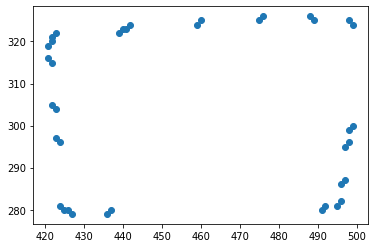

In [58]:
contour_gt = contour_gt.reshape(-1, 2)
plt.scatter(contour_gt[:, 0], contour_gt[:, 1])

### quadrilaterals.py

In [72]:
line([0, 1], [1, 1])

(0, 1, 1)

In [77]:
import unittest
import numpy as np
#from hypothesis import given
#import hypothesis.strategies as some
#import hypothesis.extra.numpy as some_np

from extractor.quadrilaterals import line_intersection, \
    line, find_enclosing_polygon, compute_iou

class TestQuadrilaterals(unittest.TestCase):
    
    def test_line(self):
        self.assertEqual(line([0, 0], [1, 1]), (-1, 1, 0))
        self.assertEqual(line([0, 1], [1, 0]), (1, 1, 1))
        self.assertEqual(line([0, 0], [-1, -1]), (1, -1, 0))
    
    def test_line_intersection(self):
        # intersecting lines
        l1 = (-1, 1, 0) # line([0, 0], [1, 1])
        l2 = (1, 1, 1) # line([0, 1], [1, 0])
        has_intersect, intersect_pt = line_intersection(l1, l2)
        self.assertTrue(has_intersect)
        self.assertEqual(intersect_pt, (0.5, 0.5))
        
        # intersecting lines 2
        l1 = (1, -1, 0) # line([0, 0], [-1, -1])
        l2 = (1, 1, 1) # line([0, 1], [1, 0])
        has_intersect, intersect_pt = line_intersection(l1, l2)
        self.assertTrue(has_intersect)
        self.assertEqual(intersect_pt, (0.5, 0.5))
        
        # colinear lines
        l1 = (-1, 1, 0) # line([0, 0], [1, 1])
        l2 = (-1, 1, 0) # line([1, 1], [2, 2])
        has_intersect, intersect_pt = line_intersection(l1, l2)
        self.assertFalse(has_intersect)
        self.assertEqual(intersect_pt, (0.0, 0.0))
        
        # parallel lines
        l1 = (0, 1, 0) # line([0, 0], [1, 0])
        l2 = (0, 1, 1) # line([0, 1], [1, 1])
        has_intersect, intersect_pt = line_intersection(l1, l2)
        self.assertFalse(has_intersect)
        self.assertEqual(intersect_pt, (0.0, 0.0))
    
    def test_compute_iou(self):
        pass
    
    def test_find_enclosing_polygon(self):
        pass
        

In [78]:
t = TestQuadrilaterals()
t.test_line()
t.test_line_intersection()
t.test_compute_iou()
t.test_find_enclosing_polygon()